# Magic Formula - Modelo de Investimento com Backtest

## Desafio:

- Testar se a regra de investimento da fórmula mágica de Joel Grenblatt funcionou no Brasil nos últimos anos.

## Passo a passo:

* Passo 1 - Importar as bibliotecas;
* Passo 2 - Baixar os dados disponibilizados;
* Passo 3 - Pegar as datas que iremos balancear a carteira;
* Passo 4 - Filtrar a liquidez;
* Passo 5 - Criar o ranking dos indicadores;
* Passo 6 - Criar as carteiras;
* Passo 7 - Calcular a rentabilidade por carteira;
* Passo 8 - Carcular a rentabilidade do modelo;
* Passo 9 - Calcular a rentabilidade do ibovespa no mesmo período;
* Passo 10 - Analisar os resultados.

## Passo 1: Importando os módulos necessários

In [1]:
import pandas as pd
import quantstats as qs

## Passo 2: Baixar os dados disponibilizados

In [2]:
# Dados dos ativos desde 2013

dados_empresas = pd.read_csv('dados_empresas.csv')

## Passo 3: Filtrar liquidez

In [3]:
# Filtrar empresas que negociam a partir de 1 milhão por dia

dados_empresas = dados_empresas[dados_empresas['volume_negociado'] > 1000000]
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic
0,2016-12-31,AALR3,14.45,5375545.0,0.08785,0.05890
1,2017-01-31,AALR3,13.75,3116406.0,0.09044,0.05890
2,2017-02-28,AALR3,12.56,3077805.0,0.09519,0.05890
3,2017-03-31,AALR3,15.41,3141709.0,0.04781,0.05517
4,2017-04-30,AALR3,18.32,6444929.0,0.04118,0.05517
...,...,...,...,...,...,...
49268,2023-04-30,ZAMP3,4.20,4243398.0,0.05860,0.03526
49269,2023-05-31,ZAMP3,3.81,4414483.0,0.05600,0.03131
49270,2023-06-30,ZAMP3,4.55,17615157.0,0.04998,0.03131
49271,2023-07-31,ZAMP3,4.42,4634150.0,0.05094,0.03131


## Passo 4 - Calcular os retornos mensais das empresas

In [4]:
# calcular o retorno mensal de cada empresa
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['preco_fechamento_ajustado'].pct_change()

# Alocando o resultado do retorno médio no início do período (mês anterior), em outras palavras,
# mês de criação da carteira.
# Exemplo: cria-se uma carteira em 31/12/2020, esta carteira é mensal, logo, o seu resultado será
# no dia 31/01/2021, ou seja, para sabermos o retorno da carteira de dezembro, pegaremos o cálculo
# do fim de janeiro e aplicá-lo em dezembro.

dados_empresas['retorno'] = dados_empresas['retorno'].shift(-1)
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno
0,2016-12-31,AALR3,14.45,5375545.0,0.08785,0.05890,-0.048443
1,2017-01-31,AALR3,13.75,3116406.0,0.09044,0.05890,-0.086545
2,2017-02-28,AALR3,12.56,3077805.0,0.09519,0.05890,0.226911
3,2017-03-31,AALR3,15.41,3141709.0,0.04781,0.05517,0.188838
4,2017-04-30,AALR3,18.32,6444929.0,0.04118,0.05517,-0.045306
...,...,...,...,...,...,...,...
49268,2023-04-30,ZAMP3,4.20,4243398.0,0.05860,0.03526,-0.092857
49269,2023-05-31,ZAMP3,3.81,4414483.0,0.05600,0.03131,0.194226
49270,2023-06-30,ZAMP3,4.55,17615157.0,0.04998,0.03131,-0.028571
49271,2023-07-31,ZAMP3,4.42,4634150.0,0.05094,0.03131,0.255656


## Passo 5 - Criar o ranking dos indicadores

In [5]:
dados_empresas['ranking_ebit_ev'] = dados_empresas.groupby('data')['ebit_ev'].rank(ascending = False)
dados_empresas['ranking_roic'] = dados_empresas.groupby('data')['roic'].rank(ascending = False)

dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ebit_ev,ranking_roic
0,2016-12-31,AALR3,14.45,5375545.0,0.08785,0.05890,-0.048443,40.0,61.0
1,2017-01-31,AALR3,13.75,3116406.0,0.09044,0.05890,-0.086545,33.0,63.0
2,2017-02-28,AALR3,12.56,3077805.0,0.09519,0.05890,0.226911,32.0,67.0
3,2017-03-31,AALR3,15.41,3141709.0,0.04781,0.05517,0.188838,78.0,77.0
4,2017-04-30,AALR3,18.32,6444929.0,0.04118,0.05517,-0.045306,85.0,76.0
...,...,...,...,...,...,...,...,...,...
49268,2023-04-30,ZAMP3,4.20,4243398.0,0.05860,0.03526,-0.092857,161.0,167.0
49269,2023-05-31,ZAMP3,3.81,4414483.0,0.05600,0.03131,0.194226,155.0,170.0
49270,2023-06-30,ZAMP3,4.55,17615157.0,0.04998,0.03131,-0.028571,165.0,179.0
49271,2023-07-31,ZAMP3,4.42,4634150.0,0.05094,0.03131,0.255656,160.0,177.0


In [6]:
dados_empresas['ranking_final'] = dados_empresas['ranking_ebit_ev'] + dados_empresas['ranking_roic']
dados_empresas['ranking_final'] = dados_empresas.groupby('data')['ranking_final'].rank()

In [7]:
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ebit_ev,ranking_roic,ranking_final
0,2016-12-31,AALR3,14.45,5375545.0,0.08785,0.05890,-0.048443,40.0,61.0,50.5
1,2017-01-31,AALR3,13.75,3116406.0,0.09044,0.05890,-0.086545,33.0,63.0,47.0
2,2017-02-28,AALR3,12.56,3077805.0,0.09519,0.05890,0.226911,32.0,67.0,51.0
3,2017-03-31,AALR3,15.41,3141709.0,0.04781,0.05517,0.188838,78.0,77.0,80.5
4,2017-04-30,AALR3,18.32,6444929.0,0.04118,0.05517,-0.045306,85.0,76.0,87.5
...,...,...,...,...,...,...,...,...,...,...
49268,2023-04-30,ZAMP3,4.20,4243398.0,0.05860,0.03526,-0.092857,161.0,167.0,175.0
49269,2023-05-31,ZAMP3,3.81,4414483.0,0.05600,0.03131,0.194226,155.0,170.0,171.0
49270,2023-06-30,ZAMP3,4.55,17615157.0,0.04998,0.03131,-0.028571,165.0,179.0,181.5
49271,2023-07-31,ZAMP3,4.42,4634150.0,0.05094,0.03131,0.255656,160.0,177.0,177.0


## Passo 6 - Criar as carteiras

In [8]:
dados_empresas = dados_empresas[dados_empresas['ranking_final'] <= 10]
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ebit_ev,ranking_roic,ranking_final
1352,2016-03-31,ALSC3,12.45,6109292.0,0.22743,0.21115,0.201606,4.0,8.0,1.0
1353,2016-04-30,ALSC3,14.96,5974473.0,0.18712,0.21115,-0.185160,6.0,8.0,1.0
1354,2016-05-31,ALSC3,12.19,4164513.0,0.23420,0.21412,0.132896,4.0,7.0,2.0
1355,2016-06-30,ALSC3,13.81,2583221.0,0.20543,0.21412,0.027516,4.0,7.0,2.0
1356,2016-07-31,ALSC3,14.19,8624183.0,0.19963,0.21412,0.039464,3.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...
48554,2018-07-31,VULC3,5.15,5852761.0,0.17556,0.25297,-0.033010,7.0,6.0,2.0
48555,2018-08-31,VULC3,4.98,2394638.0,0.14699,0.21972,-0.072289,13.0,9.0,5.0
48556,2018-09-30,VULC3,4.62,1770684.0,0.15893,0.21972,0.233766,10.0,10.0,6.0
48557,2018-10-31,VULC3,5.70,3056020.0,0.12801,0.21972,0.017544,23.0,12.0,7.0


## Passo 7 - Calcular a rentabilidade por carteira

In [9]:
rentabilidade_por_carteira = dados_empresas.groupby('data')['retorno'].mean()
rentabilidade_por_carteira = rentabilidade_por_carteira.to_frame()

## Passo 8 - Calcular a rentabilidade do modelo

In [10]:
# Função cumprod para acumular as rentabilidades com juros compostos
rentabilidade_por_carteira['retorno'] = (rentabilidade_por_carteira['retorno'] + 1).cumprod() - 1
rentabilidade_por_carteira

,retorno
data,
2012-12-31,-0.023145
2013-01-31,-0.005368
2013-02-28,0.014808
2013-03-31,0.044644
2013-04-30,0.062649
...,...
2023-04-30,8.079077
2023-05-31,9.088580
2023-06-30,9.454210


In [11]:
# Deslocar as rentabilidades 1 linha para baixo
rentabilidade_por_carteira['retorno'] = rentabilidade_por_carteira['retorno'].shift(1)
rentabilidade_por_carteira = rentabilidade_por_carteira.dropna() # removendo a última rentabilidade
rentabilidade_por_carteira

,retorno
data,
2013-01-31,-0.023145
2013-02-28,-0.005368
2013-03-31,0.014808
2013-04-30,0.044644
2013-05-31,0.062649
...,...
2023-04-30,7.824258
2023-05-31,8.079077
2023-06-30,9.088580


## Passo 9 - Calcular a rentabilidade do ibovespa no mesmo período

In [12]:
ibov = pd.read_csv('ibov.csv')
retornos_ibov = ibov['fechamento'].pct_change().dropna()
retornos_ibov = (retornos_ibov + 1).cumprod() - 1

1     -0.019533
2     -0.057878
3     -0.075469
4     -0.082716
5     -0.122162
         ...   
124    0.713340
125    0.777381
126    0.937374
127    1.000637
128    0.898898
Name: fechamento, Length: 128, dtype: float64

In [13]:
rentabilidade_por_carteira['ibovespa'] = retornos_ibov.values

C:\Users\d311r.DESKTOP-O2NL7MH\AppData\Local\Temp\ipykernel_9444\980708533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rentabilidade_por_carteira['ibovespa'] = retornos_ibov.values


,retorno,ibovespa
data,,
2013-01-31,-0.023145,-0.019533
2013-02-28,-0.005368,-0.057878
2013-03-31,0.014808,-0.075469
2013-04-30,0.044644,-0.082716
2013-05-31,0.062649,-0.122162
...,...,...
2023-04-30,7.824258,0.713340
2023-05-31,8.079077,0.777381
2023-06-30,9.088580,0.937374


## Passo 10 - Analisar os resultados

In [15]:
qs.extend_pandas()

In [16]:
# Alterando o index para data
rentabilidade_por_carteira.index = pd.to_datetime(rentabilidade_por_carteira.index)
rentabilidade_por_carteira

,retorno,ibovespa
data,,
2013-01-31,-0.023145,-0.019533
2013-02-28,-0.005368,-0.057878
2013-03-31,0.014808,-0.075469
2013-04-30,0.044644,-0.082716
2013-05-31,0.062649,-0.122162
...,...,...
2023-04-30,7.824258,0.713340
2023-05-31,8.079077,0.777381
2023-06-30,9.088580,0.937374


C:\Users\d311r.DESKTOP-O2NL7MH\anaconda3\lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


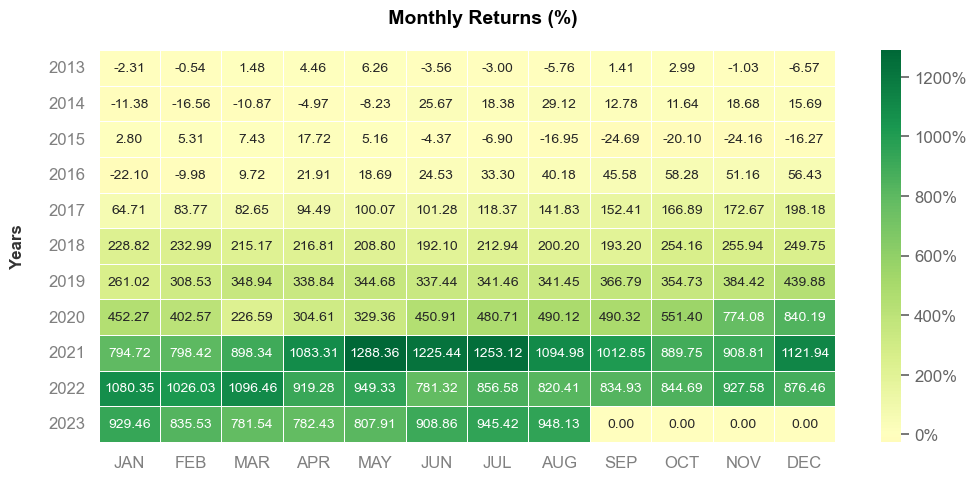

In [17]:
rentabilidade_por_carteira['retorno'].plot_monthly_heatmap()